In [1]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *

In [2]:
df = load_data()

# Evaluate the best number of Cluster

In [3]:
matrix = tf_idf(df)

In [4]:
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.06539
Clusters = 3 ,Silhouette Score = 0.0973
Clusters = 4 ,Silhouette Score = 0.12028
Clusters = 5 ,Silhouette Score = 0.13913
Clusters = 6 ,Silhouette Score = 0.14752
Clusters = 7 ,Silhouette Score = 0.11169
Clusters = 8 ,Silhouette Score = 0.09029
Clusters = 9 ,Silhouette Score = 0.09825
Clusters = 10 ,Silhouette Score = 0.06
Clusters = 11 ,Silhouette Score = 0.07791
Clusters = 12 ,Silhouette Score = 0.0428
Clusters = 13 ,Silhouette Score = 0.06531
Clusters = 14 ,Silhouette Score = 0.02367


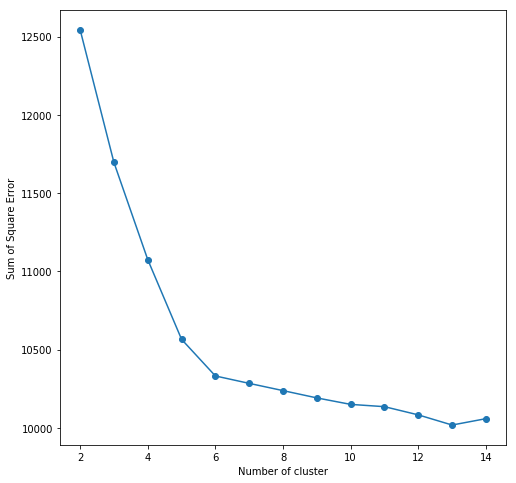

In [5]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [6]:
clusters = kmeans(matrix = matrix, cluster_num = 6, score = sscore[6] )

In [7]:
def silhouette_graph(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

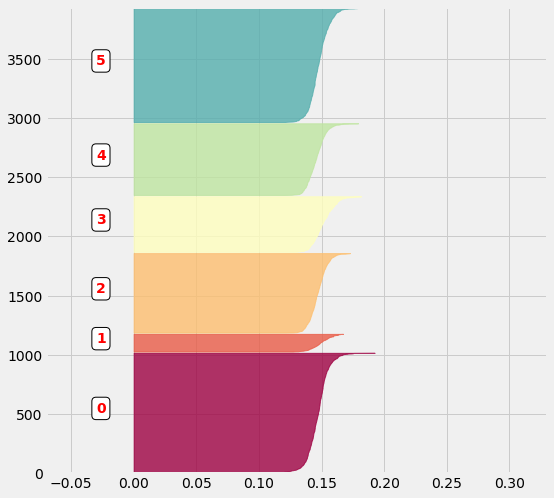

In [8]:
# Plot Silhouette graph
sample_silhouette_values = silhouette_samples(matrix, clusters)
silhouette_graph(6, [-0.07, 0.33], len(matrix), sample_silhouette_values, clusters)

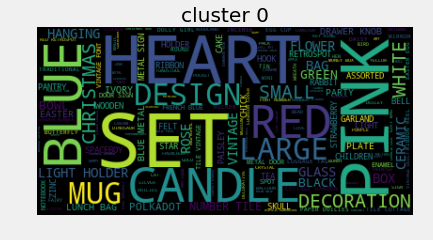

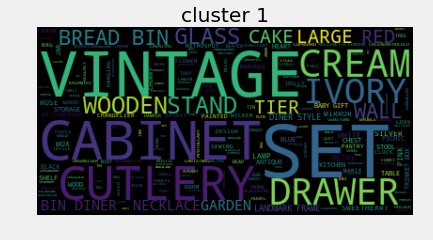

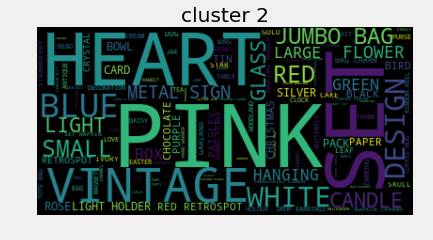

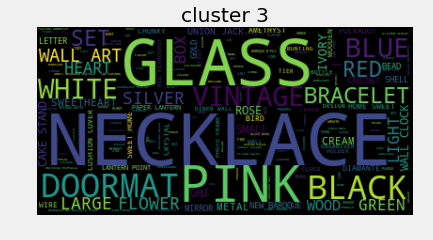

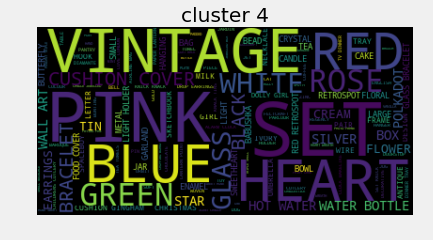

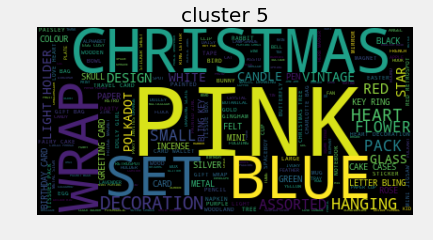

In [9]:
# Plot word cloud
d_list = df['Description'].unique().tolist()
prod_cluster = defaultdict(list)
for i in range(len(clusters)):
    cluster_num = clusters[i]
    prod_cluster[cluster_num].append(d_list[i])
for i in range(len(prod_cluster)):
    s = " "
    words = s.join(prod_cluster[i])
    wordcloud = WordCloud().generate(text = words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('cluster {}'.format(i))
    plt.show()

In [10]:
df = tf_idf_write_back(df,clusters)

In [11]:
tf_idf_rfm = rfm(df,1)
tf_idf_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_0,cate_1,cate_2,cate_3,cate_4,cate_5
0,17850,34,372,5391.21,594.12,607.75,1048.50,1262.80,1878.04,0.00
1,13047,9,56,3232.59,494.78,140.80,536.48,826.45,956.90,277.18
2,12583,15,2,6705.38,1532.50,230.25,1166.40,245.25,2082.10,1448.88
3,13748,5,95,948.25,147.00,93.65,577.32,29.40,48.20,52.68
4,15100,3,333,876.00,0.00,876.00,0.00,0.00,0.00,0.00
5,15291,14,25,4623.30,978.46,179.05,500.76,1972.95,784.60,207.48
6,14688,21,7,5579.10,1140.47,25.00,2120.08,428.85,964.60,900.10
7,17809,12,16,5411.91,1232.89,0.00,783.00,1843.15,1425.49,127.38
8,15311,91,0,60632.75,18800.67,755.00,22712.55,7703.65,5879.91,4780.97
9,16098,7,87,2005.63,93.30,528.20,551.96,382.50,404.00,45.67


In [12]:
matrix = rfm_matrix(tf_idf_rfm)
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.71417
Clusters = 3 ,Silhouette Score = 0.63272
Clusters = 4 ,Silhouette Score = 0.5364
Clusters = 5 ,Silhouette Score = 0.55335
Clusters = 6 ,Silhouette Score = 0.53978
Clusters = 7 ,Silhouette Score = 0.5152
Clusters = 8 ,Silhouette Score = 0.52413
Clusters = 9 ,Silhouette Score = 0.44344
Clusters = 10 ,Silhouette Score = 0.44213
Clusters = 11 ,Silhouette Score = 0.42797
Clusters = 12 ,Silhouette Score = 0.46088
Clusters = 13 ,Silhouette Score = 0.45488
Clusters = 14 ,Silhouette Score = 0.48038


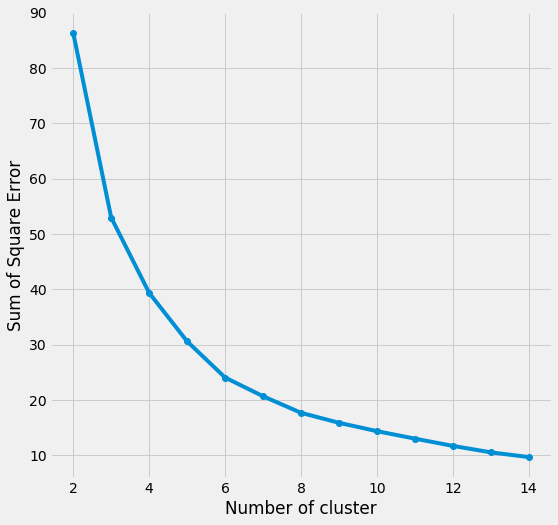

In [13]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [14]:
clusters = kmeans(matrix = matrix, cluster_num = 5, score = sscore[5] )
len(clusters)

4322

In [15]:
tf_idf_rfm = rfm_write_back(tf_idf_rfm,clusters) 
tf_idf_rfm.head(10)

,CustomerID,Frequency,Recency,Amount,cate_0,cate_1,cate_2,cate_3,cate_4,cate_5,Group
0,17850,34,372,5391.21,594.12,607.75,1048.50,1262.80,1878.04,0.00,2
1,13047,9,56,3232.59,494.78,140.80,536.48,826.45,956.90,277.18,3
2,12583,15,2,6705.38,1532.50,230.25,1166.40,245.25,2082.10,1448.88,0
3,13748,5,95,948.25,147.00,93.65,577.32,29.40,48.20,52.68,3
4,15100,3,333,876.00,0.00,876.00,0.00,0.00,0.00,0.00,2
5,15291,14,25,4623.30,978.46,179.05,500.76,1972.95,784.60,207.48,0
6,14688,21,7,5579.10,1140.47,25.00,2120.08,428.85,964.60,900.10,0
7,17809,12,16,5411.91,1232.89,0.00,783.00,1843.15,1425.49,127.38,0
8,15311,91,0,60632.75,18800.67,755.00,22712.55,7703.65,5879.91,4780.97,4
9,16098,7,87,2005.63,93.30,528.20,551.96,382.50,404.00,45.67,3


In [16]:
tf_idf_rfm.groupby('Group', as_index = False)['CustomerID'].count()

,Group,CustomerID
0,0,2154
1,1,614
2,2,497
3,3,1041
4,4,16
